In [1]:
import pandas as pd
ab = pd.read_csv('CTR_Sim.csv') #,names=['Control','Test']

We hypothesize that our subject lines for the marketing email blasts have a different impact when sent during the week vs over the weekend. Perhaps a busy M-F worker ignores our email M-F, but has more spare time on the weekend to check out the email.

In [2]:
## Here is the data:
ab.head(10)

,Clicks Conv,Clicks,Weekend
0,11,19,0
1,10,20,0
2,11,17,0
3,15,14,0
4,11,18,0
5,30,21,1
6,22,26,1
7,15,19,0
8,12,17,0
9,14,19,0


The distributions are shown below:

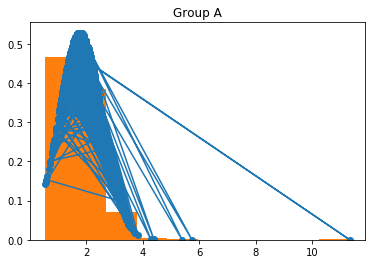

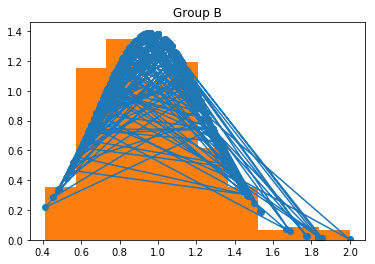

T-Test

Ttest_indResult(statistic=17.841775584456851, pvalue=5.1575826286615583e-62)
5724 6197
0.607502996968 1.08263452131
0.744134639538
4.66894454348e-05
0.00683296754235
-69.5351648316 0.0


(-69.535164831593249, 0.0)

In [18]:
import numpy as np
import scipy.stats as stats
from __future__ import division
import pylab as pl
%matplotlib inline

# running a t-test
# 
ab['Rate'] = ab['Clicks']/ab['Clicks Conv']

a = ab.Rate[ab.Weekend==0]
b = ab.Rate[ab.Weekend==1]

# Plot distribution of A
fit = stats.norm.pdf(a, np.mean(a), np.std(a))
pl.plot(a,fit,'-o')
pl.hist(a,normed=True) 
pl.title('Group A')
pl.show()

# Plot distribution of B
fit = stats.norm.pdf(b, np.mean(b), np.std(b))
pl.plot(b,fit,'-o')
pl.hist(b,normed=True) 
pl.title('Group B')
pl.show()

# Perform T-test
print 'T-Test\n'
print stats.ttest_ind(a, b)

# null hypothesis: the samples have identical averages
# if p<0.05, reject null hypothesis that the two samples are identical

# ztest
def ztest(x1, n1, x2, n2, one_tailed=False):
    """
    One- or Two-Tailed Z-test for two samples
    
    Args:
        x1 = # of successes in Sample 1
        n1 = # of observations in Sample 1
        x2 = # of successes in Sample 2
        n2 = # of observations in Sample 2
        one_tailed = Boolean, whether or not the test should be One-Tailed
        
    Return:
        z = Z-stat
    """
    p1 = x1 / n1
    p2 = x2 / n2    
    print p1, p2
    p = (x1 + x2) / (n1 + n2)
    print p
    se = p * (1 - p) * ((1 / n1) + (1/ n2))
    sse = np.sqrt(se)
    print se
    print sse
    z = (p1 - p2) / sse
    p = 1 - stats.norm.cdf(abs(z))
    
    if not one_tailed:
        p *= 2
    print z, p
    return z, p

control_observations = ab.Clicks[ab.Weekend==0].sum()
control_successes = ab['Clicks Conv'][ab.Weekend==0].sum()
test_observations = ab.Clicks[ab.Weekend==1].sum()
test_successes = ab['Clicks Conv'][ab.Weekend==1].sum()
print test_observations, test_successes

ztest(control_successes, control_observations, test_successes, test_observations, one_tailed=False)

In [16]:
ab.groupby('Weekend').sum()

,Clicks Conv,Clicks,Rate
Weekend,,,
0,8615,14181,1277.441765
1,6197,5724,275.118698


In [17]:
ab[ab['Clicks Conv']>ab.Clicks]

,Clicks Conv,Clicks,Weekend,Rate
3,15,14,0,0.933333
5,30,21,1,0.700000
10,16,15,0,0.937500
20,14,13,1,0.928571
26,19,18,1,0.947368
27,23,15,1,0.652174
33,30,19,1,0.633333
40,28,19,1,0.678571
41,20,16,1,0.800000
47,21,14,1,0.666667
